# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [2122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

In [2123]:
# Загружаем данные из предыдущего упражнения
df = pd.read_csv('../ex00/data/am_pm.csv')
print("Данные загружены:")
print(df.head())

Данные загружены:
         date  am  pm       target      predict
0  2020-04-17  21   2  working_day      weekend
1  2020-04-18   1  68      weekend  working_day
2  2020-04-19  18  15      weekend  working_day
3  2020-04-20   2  23  working_day  working_day
4  2020-04-21   0  25  working_day  working_day


In [2125]:
# Подготавливаем данные из дф в нампи-массивы
X = df[['am', 'pm']].to_numpy()
y = df['target'].to_numpy()

In [2126]:
# Обучаем логистическую регрессию (как в Ex00)
lr_model = LogisticRegression(random_state=21, fit_intercept=False)
lr_model.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [ ]:
# Создаем сетку для границы
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [ ]:
PIXELS = 500

h = 0.5 # шаг сетки для границы решений
h_x = (x_max - x_min) / PIXELS
h_y = (y_max - y_min) / PIXELS
h = min(h_x, h_y)

h

np.float64(0.186)

In [ ]:
# реальный масштаб
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# квадратный масштаб
square_size = max([x_max, y_max])
h_square = square_size / PIXELS
xx_square, yy_square = np.meshgrid(np.arange(x_min, square_size, h_square),
                       np.arange(y_min, square_size, h_square))


## Граница решений

In [2131]:
# Спрашиваем модель про КАЖДУЮ точку сетки
Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_square = lr_model.predict(np.c_[xx_square.ravel(), yy_square.ravel()])

# Переводим в числа для визуализации
Z_numeric = np.where(Z == 'working_day', 1, 0)
Z_numeric_square = np.where(Z_square == 'working_day', 1, 0)

# Возвращаем форму сетки
Z_numeric = Z_numeric.reshape(xx.shape)
Z_numeric_square = Z_numeric_square.reshape(xx_square.shape)
# Z_numeric

## График таргета

In [2132]:
# Отключаем интерактивный режим
plt.ioff()

# Создаем фигуру с двумя подграфиками в одной строке
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# plt.figure(figsize=(8, 7))

# Маски данных
working_mask = (y == 'working_day')
weekend_mask = (y == 'weekend')

In [2133]:
# левый график (квадратный масштаб)

# рисует линию границы решений (где предсказание = 0.5)
ax1.contour(xx, yy, Z_numeric, levels=[0.5], colors='black', linestyles='-', linewidths=1)
# закрашивает области разными цветами
ax1.contourf(xx, yy, Z_numeric, levels=50, alpha=0.3, cmap='RdYlBu')

# Точки с реальными метками
ax1.scatter(X[working_mask, 0], X[working_mask, 1], 
           c='blue', label='Working Day', s=50, alpha=0.8)
ax1.scatter(X[weekend_mask, 0], X[weekend_mask, 1], 
           c='red', label='Weekend', s=50, alpha=0.8)

ax1.set_xlabel('AM commits')
ax1.set_ylabel('PM commits')
ax1.set_title('Real Labels + Decision Boundary')
ax1.legend()
ax1.grid(True, alpha=0.3)

In [2134]:
# правый график (квадратный масштаб)

# рисует линию границы решений (где предсказание = 0.5)
ax2.contour(xx_square, yy_square, Z_numeric_square, levels=[0.5], colors='black', linestyles='-', linewidths=1)
# закрашивает области разными цветами
ax2.contourf(xx_square, yy_square, Z_numeric_square, levels=50, alpha=0.3, cmap='RdYlBu')

# Точки с реальными метками
ax2.scatter(X[working_mask, 0], X[working_mask, 1], 
           c='blue', label='Working Day', s=50, alpha=0.8)
ax2.scatter(X[weekend_mask, 0], X[weekend_mask, 1], 
           c='red', label='Weekend', s=50, alpha=0.8)

ax2.set_xlabel('AM commits')
ax2.set_ylabel('PM commits')
ax2.set_title('Real Labels + Decision Boundary SQUARE scale')
ax2.legend()
ax2.grid(True, alpha=0.3)

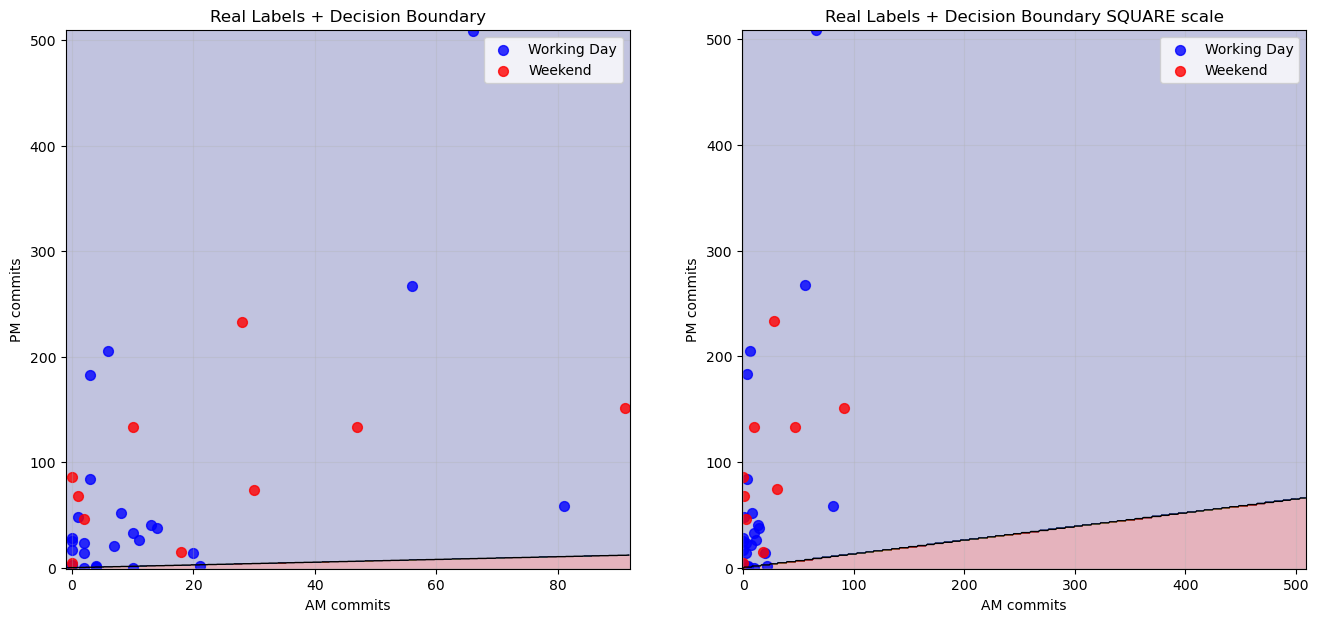

In [2135]:
plt.show()

## График предсказаний

In [2136]:
predictions = lr_model.predict(X)

accuracy = accuracy_score(y, predictions)
f"Accuracy логистической регрессии: {accuracy:.8f}"

'Accuracy логистической регрессии: 0.62857143'

## Коэффициенты логистической регрессии (веса признаков):
### Модель работает так: AM_коэф * AM + PM_коэф * PM = граница

Если AM_коэф = 0.001, а PM_коэф = 0.002, то модель считает что PM в 2 раза важнее для принятия решения.

In [2137]:
print(f"AM коэффициент: {lr_model.coef_[0][0]:.6f}")
print(f"PM коэффициент: {lr_model.coef_[0][1]:.6f}")

AM коэффициент: -0.000387
PM коэффициент: 0.002981


In [ ]:
# График: Предсказания + граница решений

# Создаем фигуру с двумя подграфиками в одной строке
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7));

# Новые маски с предсказанными метками
pred_working_mask = (predictions == 'working_day')
pred_weekend_mask = (predictions == 'weekend')

In [2139]:
# левый график (полный масштаб)

# Та же граница решений (где предсказание = 0.5)
ax1.contour(xx, yy, Z_numeric, levels=[0.5], colors='black', linestyles='-', linewidths=1)
# закрашивает области разными цветами
ax1.contourf(xx, yy, Z_numeric, levels=50, alpha=0.3, cmap='RdYlBu')

# Точки с реальными метками
ax1.scatter(X[pred_working_mask, 0], X[pred_working_mask, 1], 
           c='blue', label='Working Day', s=50, alpha=0.8)
ax1.scatter(X[pred_weekend_mask, 0], X[pred_weekend_mask, 1], 
           c='red', label='Weekend', s=50, alpha=0.8)

ax1.set_xlabel('AM commits')
ax1.set_ylabel('PM commits')
ax1.set_title('Predictions + Decision Boundary')
ax1.legend()
ax1.grid(True, alpha=0.3)

In [2140]:
# правый график (квадратный масштаб)

# рисует линию границы решений (где предсказание = 0.5)
ax2.contour(xx_square, yy_square, Z_numeric_square, levels=[0.5], colors='black', linestyles='-', linewidths=1)
# закрашивает области разными цветами
ax2.contourf(xx_square, yy_square, Z_numeric_square, levels=50, alpha=0.3, cmap='RdYlBu')

# Точки с предсказанными метками
ax2.scatter(X[pred_working_mask, 0], X[pred_working_mask, 1], 
           c='blue', label='Working Day (predicted)', s=50, alpha=0.8)
ax2.scatter(X[pred_weekend_mask, 0], X[pred_weekend_mask, 1], 
           c='red', label='Weekend (predicted)', s=50, alpha=0.8)

ax2.set_xlabel('AM commits')
ax2.set_ylabel('PM commits')
ax2.set_title('Predictions + Decision Boundary SQUARE scale')
ax2.legend()
ax2.grid(True, alpha=0.3)

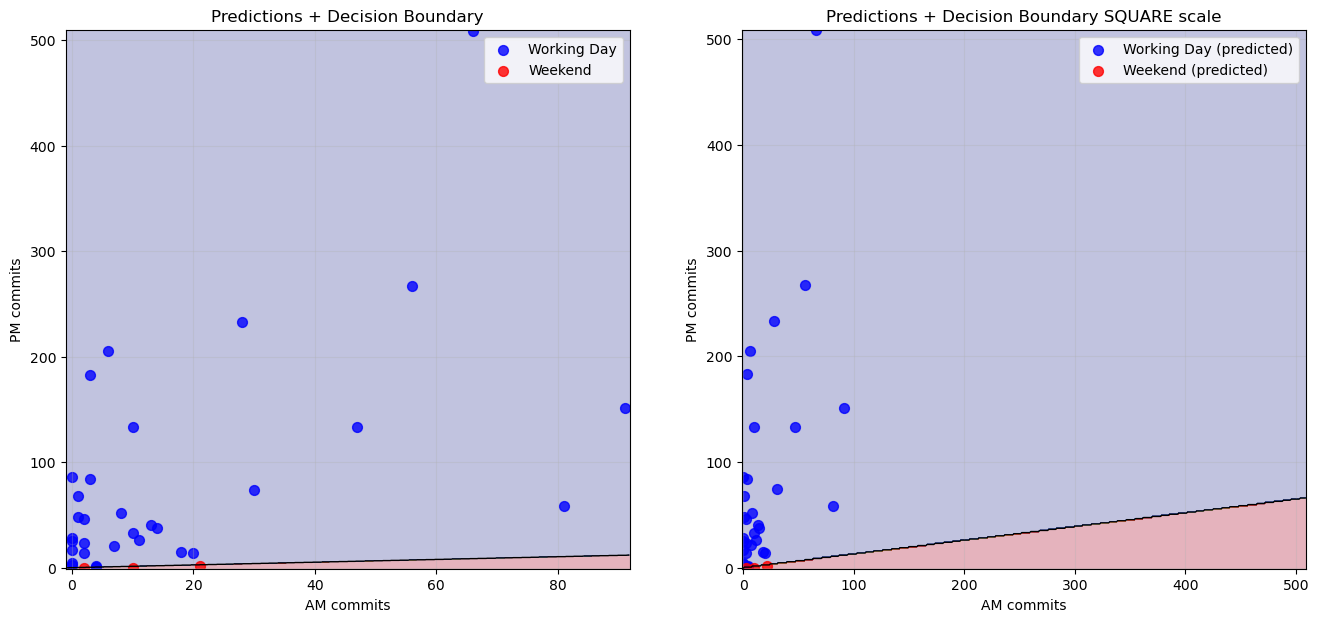

In [2141]:
plt.show()

### Причины низкой границы:

- Разные масштабы данных: AM коммиты 0-100, PM коммиты 0-500. Модель считает что PM намного важнее.
- fit_intercept=False: Нет свободного члена, линия должна проходить через начало координат.
- Слабая разделимость: Классы расположены близко, модель не может найти хорошую границу.

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

### Стандартизация приводит все к одному масштабу: среднее=0, стандартное отклонение=1

In [2142]:
# Стандартизируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [2143]:
print("До стандартизации:")
print(f"AM: min={X[:, 0].min():.1f}, max={X[:, 0].max():.1f}, среднее={X[:, 0].mean():.1f}")
print(f"PM: min={X[:, 1].min():.1f}, max={X[:, 1].max():.1f}, среднее={X[:, 1].mean():.1f}")

print(f"\nСтандартное отклонение по AM: {X[:, 0].std():.1f}")
print(f"Стандартное отклонение по PM: {X[:, 1].std():.1f}")

До стандартизации:
AM: min=0.0, max=91.0, среднее=16.3
PM: min=0.0, max=509.0, среднее=75.3

Стандартное отклонение по AM: 23.3
Стандартное отклонение по PM: 101.8


Дни с мало AM коммитов (меньше 16.3) → отрицательные значения (-0.7...)

Дни с много AM коммитов (больше 16.3) → положительные значения (до 3.2)

Среднее = 0 потому что мы "сдвинули" центр в ноль

In [2144]:
print("\nПосле стандартизации:")
print(f"AM: min={X_scaled[:, 0].min():.1f}, max={X_scaled[:, 0].max():.1f}, среднее={X_scaled[:, 0].mean():.1f}")
print(f"PM: min={X_scaled[:, 1].min():.1f}, max={X_scaled[:, 1].max():.1f}, среднее={X_scaled[:, 1].mean():.1f}")


После стандартизации:
AM: min=-0.7, max=3.2, среднее=0.0
PM: min=-0.7, max=4.3, среднее=-0.0


## Переобучаем

In [2145]:
# Обучаем логистическую регрессию (как в Ex00)
lr_model = LogisticRegression(random_state=21, fit_intercept=False)
lr_model.fit(X_scaled, y)

predictions_scaled = lr_model.predict(X_scaled)

accuracy = accuracy_score(y, predictions_scaled)
print(f"Accuracy логистической регрессии после StandardScaler: {accuracy:.8f}")

Accuracy логистической регрессии после StandardScaler: 0.74285714


### fit_intercept=False означает что уравнение в стандартизованных координатах проходит через (0,0), а НЕ в исходных!

In [2146]:
print(f"AM коэффициент: {lr_model.coef_[0][0]:.6f}")
print(f"PM коэффициент: {lr_model.coef_[0][1]:.6f}")

AM коэффициент: -0.253928
PM коэффициент: -0.073829


In [2147]:
# 2. Стандартизуем сетку для модели
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid_points)

In [2148]:
# Граница решений (используем оригинальную сетку)

# Спрашиваем модель про КАЖДУЮ точку сетки
Z_scaled = lr_model.predict(grid_scaled)
# Z_scaled_square = lr_model.predict(np.c_[xx_square.ravel(), yy_square.ravel()])

# Переводим в числа для визуализации
Z_numeric = np.where(Z_scaled == 'working_day', 1, 0)
# Z_numeric_square = np.where(Z_scaled_square == 'working_day', 1, 0)

# Возвращаем форму сетки
Z_numeric = Z_numeric.reshape(xx.shape)
# Z_numeric_square = Z_numeric_square.reshape(xx_square.shape)
# Z_numeric

In [2149]:
# Создаем фигуру с двумя подграфиками в одной строке
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Маски данных
pred_scaled_working_mask = (predictions_scaled == 'working_day')
pred_scaled_weekend_mask = (predictions_scaled == 'weekend')

In [2150]:
# левый график (квадратный масштаб)

# рисует линию границы решений (где предсказание = 0.5)
ax1.contour(xx, yy, Z_numeric, levels=[0.5], colors='black', linestyles='-', linewidths=1)
# закрашивает области разными цветами
ax1.contourf(xx, yy, Z_numeric, levels=50, alpha=0.3, cmap='RdYlBu')

# Точки с реальными метками
ax1.scatter(X[working_mask, 0], X[working_mask, 1], 
           c='blue', label='Working Day', s=50, alpha=0.8)
ax1.scatter(X[weekend_mask, 0], X[weekend_mask, 1], 
           c='red', label='Weekend', s=50, alpha=0.8)

ax1.set_xlabel('AM commits')
ax1.set_ylabel('PM commits')
ax1.set_title('SVM: Real Labels + Decision Boundary')
ax1.legend()
ax1.grid(True, alpha=0.3)

In [2151]:
# правый график (квадратный масштаб)

# рисует линию границы решений (где предсказание = 0.5)
ax2.contour(xx, yy, Z_numeric, levels=[0.5], colors='black', linestyles='-', linewidths=1)
# закрашивает области разными цветами
ax2.contourf(xx, yy, Z_numeric, levels=50, alpha=0.3, cmap='RdYlBu')

# Точки с предсказанными метками
ax2.scatter(X[pred_scaled_working_mask, 0], X[pred_scaled_working_mask, 1], 
           c='blue', label='Working Day (predicted)', s=50, alpha=0.8)
ax2.scatter(X[pred_scaled_weekend_mask, 0], X[pred_scaled_weekend_mask, 1], 
           c='red', label='Weekend (predicted)', s=50, alpha=0.8)

ax2.set_xlabel('AM commits')
ax2.set_ylabel('PM commits')
ax2.set_title('SVM: Predictions + Decision Boundary')
ax2.legend()
ax2.grid(True, alpha=0.3)

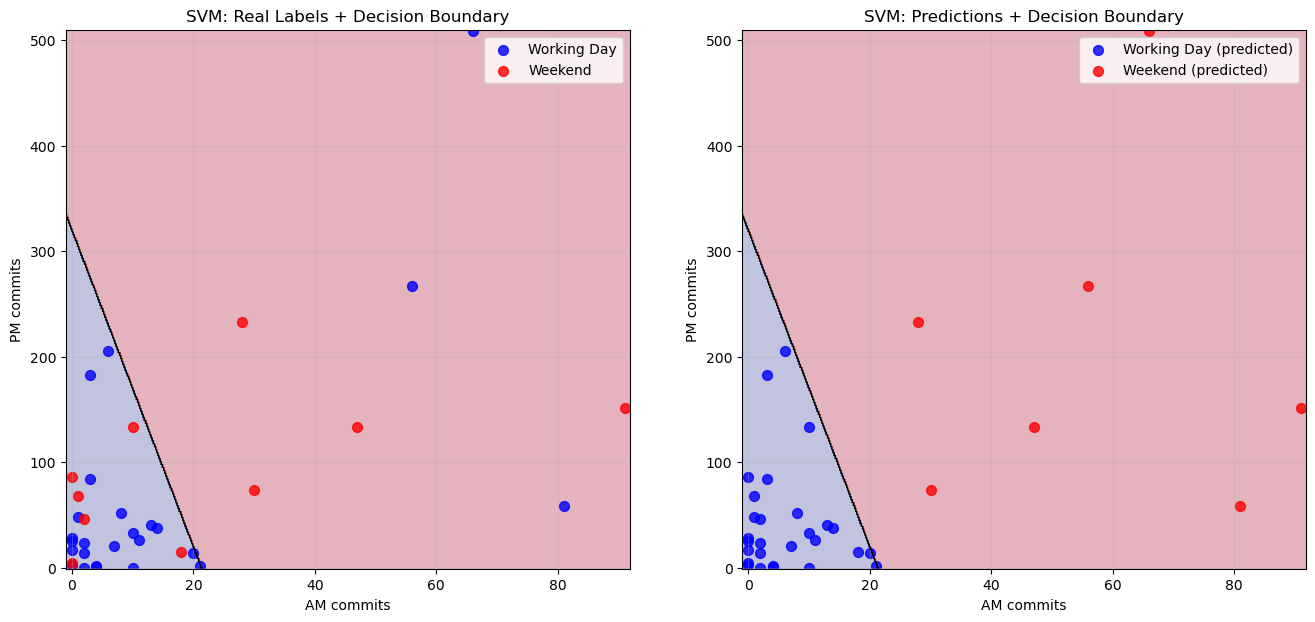

In [2152]:
plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [2153]:
# разные ядра SVM
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_results = {}

### Результаты сравнения ядер SVC:

In [2154]:
for kernel in kernels:
    svm_model = SVC(kernel=kernel, probability=True, random_state=21)
    svm_model.fit(X_scaled, y)
    svm_pred = svm_model.predict(X_scaled)
    svm_acc = accuracy_score(y, svm_pred)
    svm_results[kernel] = svm_acc
    print(f"SVM {kernel}: {svm_acc:.6f}")

SVM linear: 0.714286
SVM poly: 0.742857
SVM rbf: 0.742857
SVM sigmoid: 0.685714


### Лучшее ядро: poly с accuracy: 0.742857

In [2155]:
# получение ключа максималного значения через функцию svm_results.get
best_kernel = max(svm_results, key=svm_results.get)
print(f"Лучшее ядро: {best_kernel} с accuracy: {svm_results[best_kernel]:.6f}")


Лучшее ядро: poly с accuracy: 0.742857


In [2156]:
# Обучаем SVM с лучшим ядром
best_svm = SVC(kernel=best_kernel, probability=True, random_state=21)
best_svm.fit(X_scaled, y)

svm_predictions = best_svm.predict(X_scaled)

# Маски данных
svm_working_mask = (svm_predictions == 'working_day')
svm_weekend_mask = (svm_predictions == 'weekend')


accuracy = accuracy_score(y, svm_predictions)
print(f"Accuracy логистической регрессии после StandardScaler: {accuracy:.8f}")

Accuracy логистической регрессии после StandardScaler: 0.74285714


In [2157]:
Z_svm = best_svm.predict(grid_scaled)
Z_svm_numeric = np.where(Z_svm == 'working_day', 1, 0)
Z_svm_numeric = Z_svm_numeric.reshape(xx.shape)

In [2158]:
# Создаем фигуру с двумя подграфиками в одной строке
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

In [2159]:
# левый график (квадратный масштаб)

# рисует линию границы решений (где предсказание = 0.5)
ax1.contour(xx, yy, Z_svm_numeric, levels=[0.5], colors='black', linestyles='-', linewidths=1)
# закрашивает области разными цветами
ax1.contourf(xx, yy, Z_svm_numeric, levels=50, alpha=0.3, cmap='RdYlBu')

# Точки с реальными метками
ax1.scatter(X[working_mask, 0], X[working_mask, 1], 
           c='blue', label='Working Day', s=50, alpha=0.8)
ax1.scatter(X[weekend_mask, 0], X[weekend_mask, 1], 
           c='red', label='Weekend', s=50, alpha=0.8)

ax1.set_xlabel('AM commits')
ax1.set_ylabel('PM commits')
ax1.set_title('SVM: Real Labels + Decision Boundary')
ax1.legend()
ax1.grid(True, alpha=0.3)

In [2160]:
# правый график (квадратный масштаб)

# рисует линию границы решений (где предсказание = 0.5)
ax2.contour(xx, yy, Z_svm_numeric, levels=[0.5], colors='black', linestyles='-', linewidths=1)
# закрашивает области разными цветами
ax2.contourf(xx, yy, Z_svm_numeric, levels=50, alpha=0.3, cmap='RdYlBu')

# Точки с предсказанными метками
ax2.scatter(X[svm_working_mask, 0], X[svm_working_mask, 1], 
           c='blue', label='Working Day (predicted)', s=50, alpha=0.8)
ax2.scatter(X[svm_weekend_mask, 0], X[svm_weekend_mask, 1], 
           c='red', label='Weekend (predicted)', s=50, alpha=0.8)

ax2.set_xlabel('AM commits')
ax2.set_ylabel('PM commits')
ax2.set_title('SVM: Predictions + Decision Boundary')
ax2.legend()
ax2.grid(True, alpha=0.3)

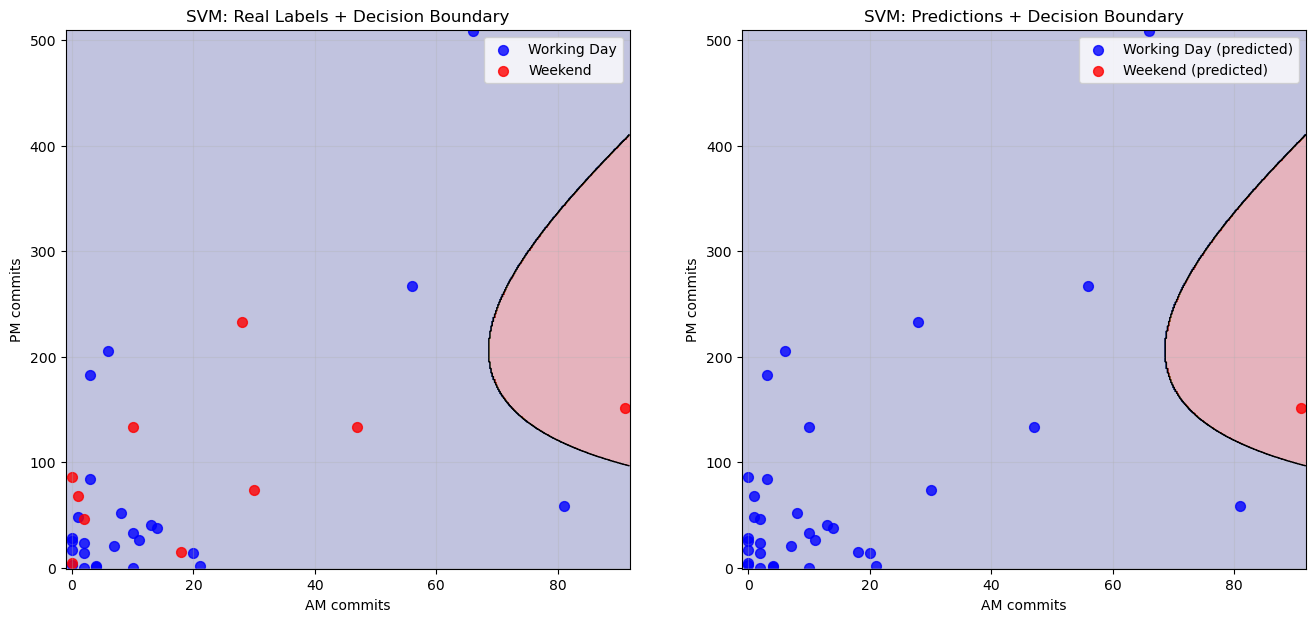

In [2161]:
plt.show()

### Из правых семи точек - 4 правильных, как и у прошлой scaled-модели (но другие)

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [2162]:
seed = 42

# Пробуем разные глубины
depths = [1, 2, 3, 4, 5, 6]
tree_results = {}

print("Decision Tree результаты:")
for depth in depths:
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=seed)
    tree_model.fit(X_scaled, y)
    tree_pred = tree_model.predict(X_scaled)
    tree_acc = accuracy_score(y, tree_pred)
    tree_results[depth] = tree_acc
    print(f"max_depth={depth}: {tree_acc:.6f}")

tree_results[7] = 0.1

Decision Tree результаты:
max_depth=1: 0.771429
max_depth=2: 0.857143
max_depth=3: 0.885714
max_depth=4: 0.942857
max_depth=5: 0.971429
max_depth=6: 1.000000


In [2164]:
# Обучаем дерево с глубиной 4 (как в задании)
tree_model = DecisionTreeClassifier(max_depth=4, random_state=seed)
tree_model.fit(X_scaled, y)

tree_predictions = tree_model.predict(X_scaled)

accuracy = accuracy_score(y, tree_predictions)
print(f"Accuracy дерева с глубиной 4: {accuracy:.8f}")


Accuracy дерева с глубиной 4: 0.94285714


In [2165]:
# Границы для дерева

Z_tree = tree_model.predict(grid_scaled)
Z_tree_numeric = np.where(Z_tree == 'working_day', 1, 0)
Z_tree_numeric = Z_tree_numeric.reshape(xx.shape)

# Маски данных

tree_working_mask = (tree_predictions == 'working_day')
tree_weekend_mask = (tree_predictions == 'weekend')

In [2166]:
# Создаем фигуру с двумя подграфиками в одной строке
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

In [2167]:
# левый график (квадратный масштаб)

# рисует линию границы решений (где предсказание = 0.5)
ax1.contour(xx, yy, Z_tree_numeric, levels=[0.5], colors='black', linestyles='-', linewidths=1)
# закрашивает области разными цветами
ax1.contourf(xx, yy, Z_tree_numeric, levels=50, alpha=0.3, cmap='RdYlBu')

# Точки с реальными метками
ax1.scatter(X[working_mask, 0], X[working_mask, 1], 
           c='blue', label='Working Day', s=50, alpha=0.8)
ax1.scatter(X[weekend_mask, 0], X[weekend_mask, 1], 
           c='red', label='Weekend', s=50, alpha=0.8)

ax1.set_xlabel('AM commits')
ax1.set_ylabel('PM commits')
ax1.set_title('Decision tree: Real Labels + Decision Boundary')
ax1.legend()
ax1.grid(True, alpha=0.3)

In [2168]:
# правый график (квадратный масштаб)

# рисует линию границы решений (где предсказание = 0.5)
ax2.contour(xx, yy, Z_tree_numeric, levels=[0.5], colors='black', linestyles='-', linewidths=1)
# закрашивает области разными цветами
ax2.contourf(xx, yy, Z_tree_numeric, levels=50, alpha=0.3, cmap='RdYlBu')

# Точки с предсказанными метками
ax2.scatter(X[tree_working_mask, 0], X[tree_working_mask, 1], 
           c='blue', label='Working Day (predicted)', s=50, alpha=0.8)
ax2.scatter(X[tree_weekend_mask, 0], X[tree_weekend_mask, 1], 
           c='red', label='Weekend (predicted)', s=50, alpha=0.8)

ax2.set_xlabel('AM commits')
ax2.set_ylabel('PM commits')
ax2.set_title('Decision tree: Predictions + Decision Boundary')
ax2.legend()
ax2.grid(True, alpha=0.3)

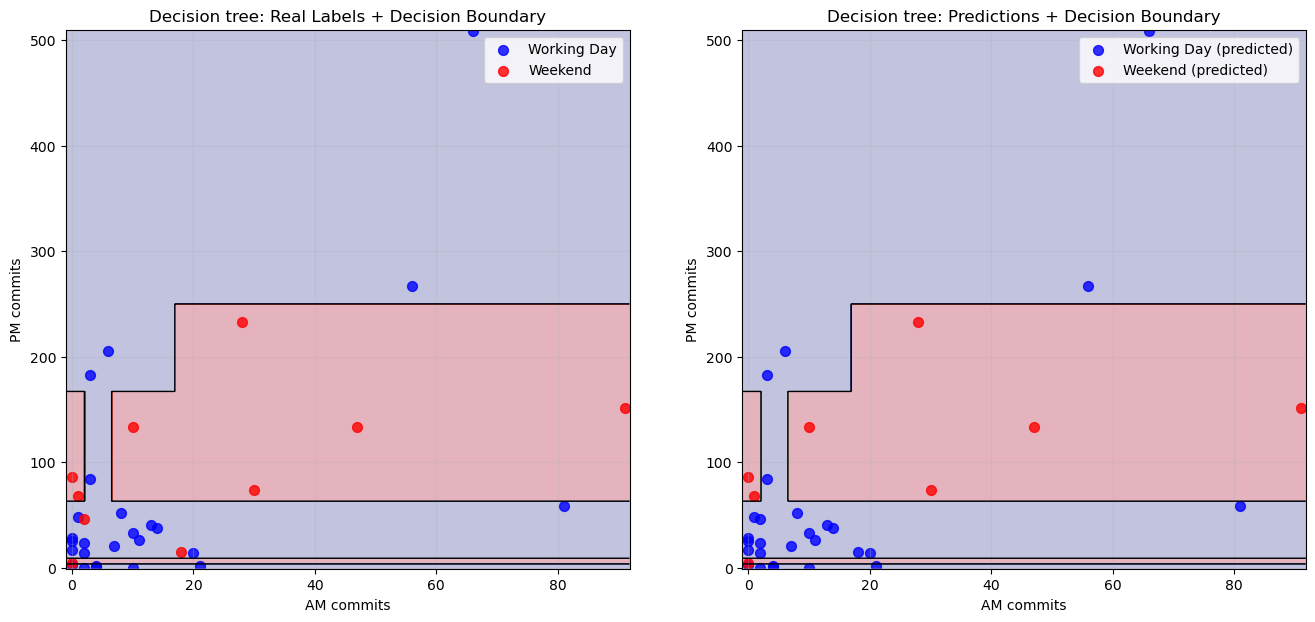

In [2169]:
plt.show()

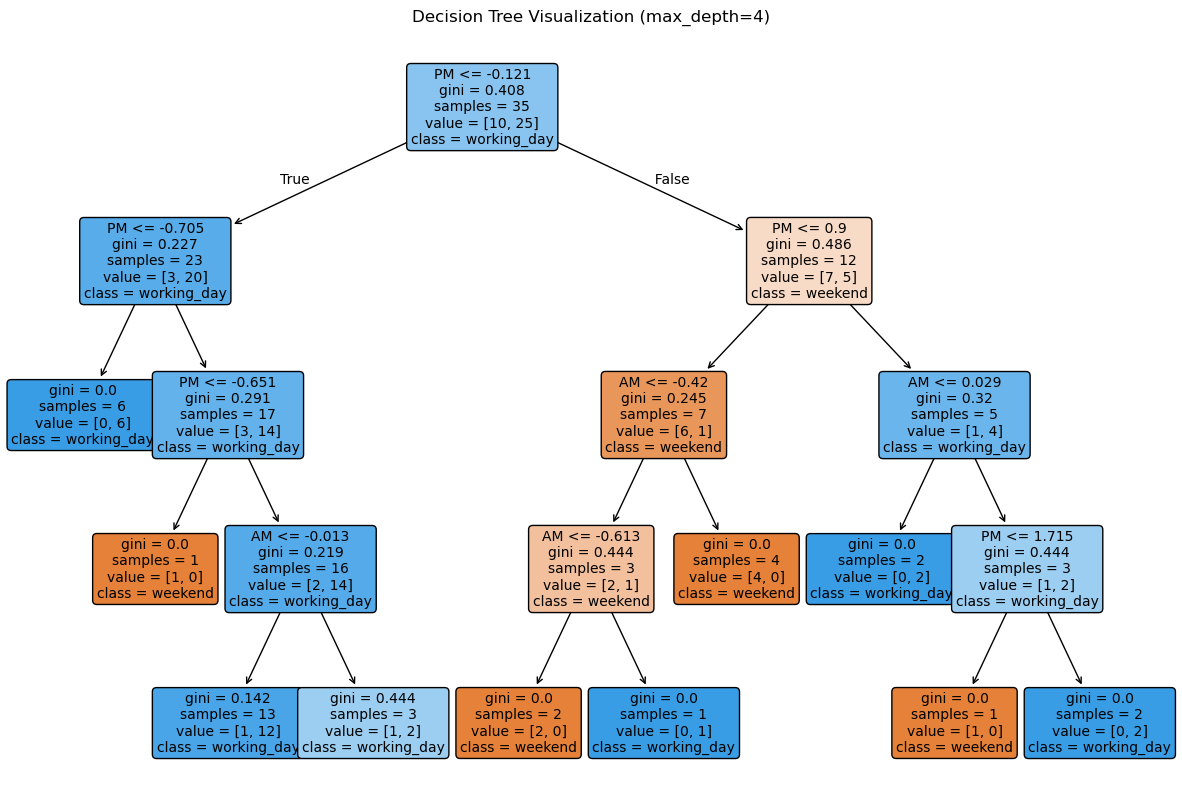

In [2170]:
# Визуализация самого дерева
plt.figure(figsize=(15, 10))
plot_tree(tree_model, feature_names=['AM', 'PM'], class_names=['weekend', 'working_day'], 
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization (max_depth=4)')
plt.show()

Gini (коэффициент Джини) — это мера "нечистоты" или неопределенности в узле дерева решений. Это один из критериев, который алгоритм использует для принятия решений о том, как лучше разделить данные.

Цвет = преобладание класса

value = [10, 25] показывает распределение классов, а не количество образцов в ветках.

Значения Gini:
- Gini = 0 — узел "чистый" (все образцы принадлежат одному классу)
- Gini = 0.5 — максимальная неопределенность для бинарной классификации (50/50)
- Чем ниже Gini, тем лучше — означает более однородный узел

Примеры с графика:

Корневой узел: gini = 0.408
- samples = 35, value = [10, 25]
- 10 weekend, 25 working_day
- Довольно высокая неопределенность

Левый лист: gini = 0.0
- samples = 6, value = [0, 6]
- Все 6 образцов — working_day
- Идеально чистый узел!

In [ ]:
# # Подсчет листьев с working_day
# def count_working_day_leaves(tree):
#     """Подсчитывает количество листьев, которые предсказывают working_day"""
#     tree_structure = tree.tree_
#     is_leaf = tree_structure.children_left == -1
    
#     working_day_leaves = 0
#     for i in range(tree_structure.node_count):
#         if is_leaf[i]:
#             # Проверяем значения классов в листе
#             values = tree_structure.value[i][0]
#             weekend_count = values[0]  # weekend
#             working_day_count = values[1]  # working_day
#             # print(tree_structure.value[i])
#             # Если working_day больше, то лист предсказывает working_day
#             if working_day_count > weekend_count and weekend_count == 0:
#                 working_day_leaves += 1
    
#     return working_day_leaves

# working_day_leaves_count = count_working_day_leaves(tree_model)
# print(f"\nКоличество листьев с меткой 'working_day': {working_day_leaves_count}")

### Количество листьев с меткой 'working_day': 4